In [1]:
from numpy import *
from myGradientDescent import *

In [2]:
#graph library
import numpy as np
import matplotlib.pyplot as plt

# Dataset 

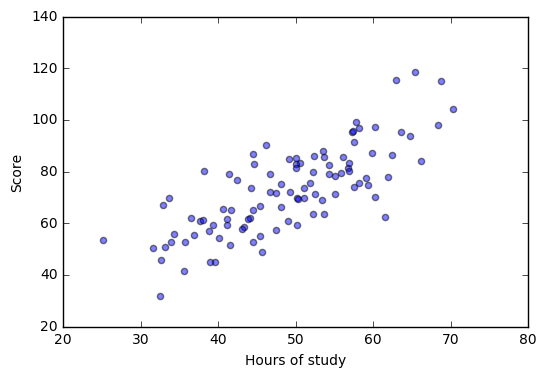

In [3]:
points = genfromtxt("data.csv", delimiter=",")
x = points[ : , 0] # get x hours of study
y = points[ : , 1] # get y exam score

#plt.xkcd()
plt.xlabel('Hours of study')
plt.ylabel('Score')
plt.scatter(x, y, alpha=0.5)
plt.show()

In [2]:
#def run():
points = genfromtxt("data.csv", delimiter=",")
learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_m, initial_b, points)))
print("Running...")
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(m, b, points)))

#if __name__ == '__main__':
#    run()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 9.451159314734957e+173, m = -4.808747047443573e+175, error = inf


C:\Users\019194\Documents\Linear\myGradientDescent.py:11: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m*x + b))**2


In [2]:
points = genfromtxt("data.csv", delimiter=",")
points[0]

yo()
#compute_error_for_line_given_points(1,2, points)

call me
